<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [33]:
import pandas as pd

Load the dataset into a dataframe.


In [34]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

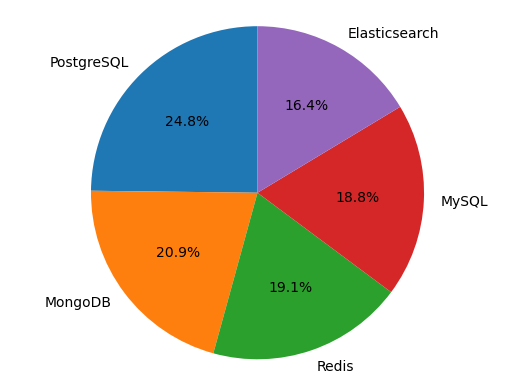

In [35]:
df['DatabaseDesireNextYear'] = df['DatabaseDesireNextYear'].str.split(';')
database = df.explode('DatabaseDesireNextYear')['DatabaseDesireNextYear'].value_counts()
top_5 = database.head(5)
import matplotlib.pyplot as plt
plt.pie(top_5, labels = top_5.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

In [36]:
database

PostgreSQL              4328
MongoDB                 3649
Redis                   3331
MySQL                   3281
Elasticsearch           2856
Microsoft SQL Server    2706
SQLite                  2437
Firebase                1650
MariaDB                 1385
DynamoDB                1044
Cassandra               1003
Oracle                   870
Other(s):                645
Couchbase                390
Name: DatabaseDesireNextYear, dtype: int64

In [37]:
df.head().T

,0,1,2,3,4
Respondent,4,9,13,16,17
MainBranch,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession,I am a developer by profession
Hobbyist,No,Yes,Yes,Yes,Yes
OpenSourcer,Never,Once a month or more often,Less than once a month but more than once per ...,Never,Less than once a month but more than once per ...
OpenSource,The quality of OSS and closed source software ...,The quality of OSS and closed source software ...,"OSS is, on average, of HIGHER quality than pro...",The quality of OSS and closed source software ...,The quality of OSS and closed source software ...
Employment,Employed full-time,Employed full-time,Employed full-time,Employed full-time,Employed full-time
Country,United States,New Zealand,United States,United Kingdom,Australia
Student,No,No,No,No,No
EdLevel,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Some college/university study without earning ...,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Master’s degree (MA, MS, M.Eng., MBA, etc.)","Bachelor’s degree (BA, BS, B.Eng., etc.)"
UndergradMajor,"Computer science, computer engineering, or sof...","Computer science, computer engineering, or sof...","Computer science, computer engineering, or sof...",NaN,"Computer science, computer engineering, or sof..."


In [38]:
df['LanguageDesireNextYear'] = df['LanguageDesireNextYear'].str.split(';')
language = df.explode('LanguageDesireNextYear')['LanguageDesireNextYear'].value_counts()
language

JavaScript               6630
HTML/CSS                 5328
Python                   5239
SQL                      5012
TypeScript               4088
C#                       3591
Bash/Shell/PowerShell    3097
Java                     2953
Go                       2759
Kotlin                   1890
C++                      1633
Rust                     1520
PHP                      1457
WebAssembly              1397
Swift                    1179
Ruby                     1029
C                        1028
Scala                     879
R                         850
Other(s):                 836
F#                        621
Elixir                    620
Dart                      610
Clojure                   413
Assembly                  336
Objective-C               310
Erlang                    310
VBA                       149
Name: LanguageDesireNextYear, dtype: int64

In [41]:
df_mysql = df["DatabaseWorkedWith"] == "MySQL"
df_mysql.value_counts()

False    10924
True       474
Name: DatabaseWorkedWith, dtype: int64

In [51]:
df.shape[0] - df["DatabaseWorkedWith"].isna().sum()

10945

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


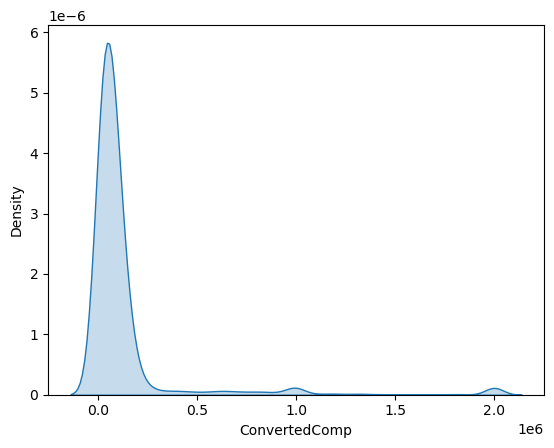

In [4]:
# your code goes here
import matplotlib.pyplot as plt
import seaborn as sns
sns.kdeplot(data=df['ConvertedComp'], shade=True)
plt.show()

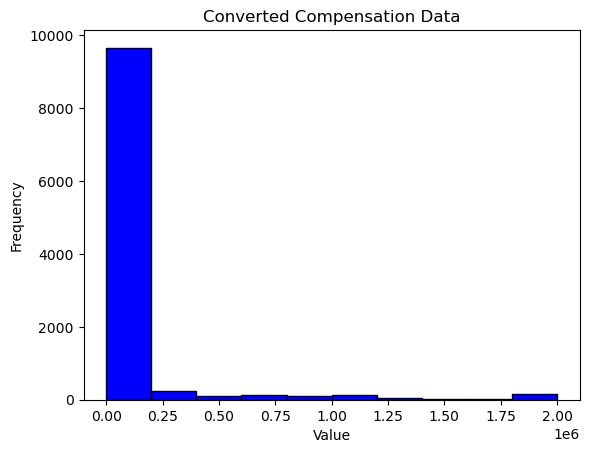

In [5]:
# your code goes here
plt.hist(df["ConvertedComp"], bins=10, color="blue", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Converted Compensation Data")
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
# your code goes here
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [7]:
# your code goes here
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
# your code goes here
df_woman = df[df["Gender"] == "Woman"]
df_woman["ConvertedComp"].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
# your code goes here
df["Age"].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


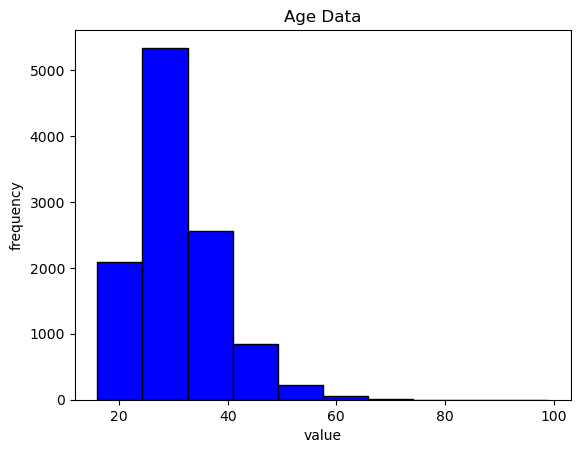

In [10]:
# your code goes here
plt.hist(df["Age"], bins=10, color="blue", edgecolor="black")
plt.xlabel("value")
plt.ylabel("frequency")
plt.title("Age Data")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


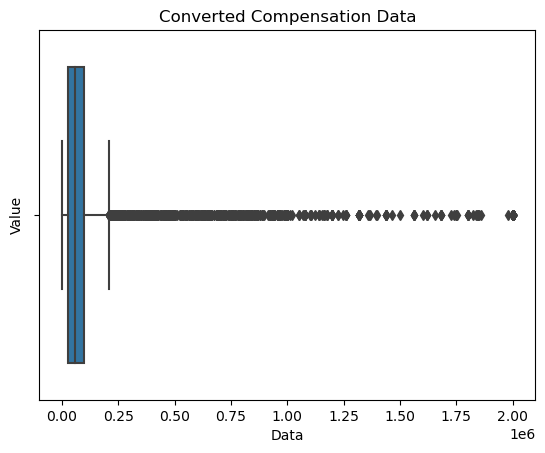

In [16]:
# your code goes here
sns.boxplot(df["ConvertedComp"])
plt.xlabel("Data")
plt.ylabel("Value")
plt.title("Converted Compensation Data")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [18]:
# your code goes here
IQR_CC = df["ConvertedComp"].quantile(0.75) - df["ConvertedComp"].quantile(0.25)
IQR_CC

73132.0

Find out the upper and lower bounds.


In [27]:
# your code goes here
low_bound = df["ConvertedComp"].quantile(0.25) - (1.5 * IQR_CC)
upr_bound = df["ConvertedComp"].quantile(0.75) + (1.5 * IQR_CC)
'Lower bound is ', low_bound, ", and upper bound is ", upr_bound

('Lower bound is ', -82830.0, ', and upper bound is ', 209698.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here
outlier = 0
for value in df["ConvertedComp"]:
    if value > upr_bound or value < low_bound:
        outlier += 1
"the number of outlier in Converted Compensation is ", outlier

('the number of outlier in Converted Compensation is ', 879)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [29]:
# your code goes here
df_without_outlier = df[(df["ConvertedComp"] >= low_bound) & (df["ConvertedComp"] <= upr_bound)]
df_without_outlier.shape

(9703, 85)

In [30]:
df["ConvertedComp"].median()

57745.0

In [33]:
df_without_outlier["ConvertedComp"].mean()

59883.20838915799

/opt/conda/envs/Python-3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


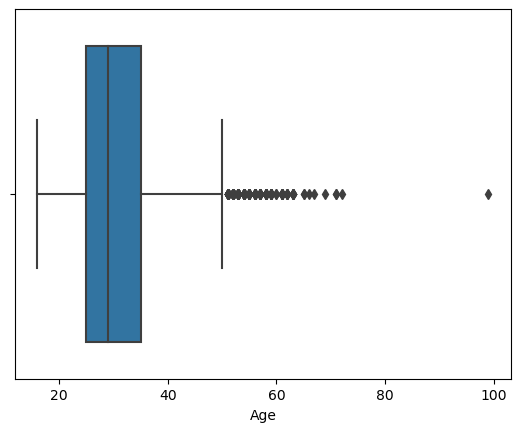

In [32]:
sns.boxplot(df["Age"])
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [37]:
# your code goes here
corr_age = df.corr()["Age"]
corr_age

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
